In [1]:

import json
from yahoofinancials import YahooFinancials as YF
import time
from datetime import datetime
import pandas as pd
from pandas_datareader import data
from typing import List, Optional
import os
import pickle 
from tqdm import tqdm
from pydantic import BaseModel
import scipy.stats as sp
from utils import *
from backtester import *
import matplotlib.pyplot as plt
import math
import yfinance as yf # https://github.com/ranaroussi/yfinance
from pandas_datareader import data as pdr

Importing plotly failed. Interactive plots will not work.


In [2]:
c_or_p = 'c'
price = 42
strike = 50
risk_free_rate = 4
days = 20
volatility = 20
a = BsmModel(c_or_p, float(price), float(strike), float(risk_free_rate), float(days)/365, float(volatility))
a.bsm_price()

41.209805172631775

In [41]:
tickers = ['MMM', 'GOOG', 'AMD']
days_back = 100
bars = getStockData(tickers, days_back)

In [3]:
stocks

NameError: name 'stocks' is not defined

In [3]:
def getStocks(tickers, days_back):
    def convert_time(epoch):
        return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(epoch))
    
    epoch_time = int(time.time())
    day_epoch = 60*60*24
    # tickers = df['Symbol'][:10]
    stocks = {}
    for tick in tqdm(tickers):
        try:
            stock_data = data.DataReader(tick, 
                            start=convert_time(epoch_time - (int(days_back)* day_epoch)), 
                            end=convert_time(epoch_time), 
                            data_source='yahoo')
            stocks[tick] = stock_data 
        except:
            print("Skipping stock for {}, bad data :<".format(tick))
    return stocks


In [2]:
tickers = ['MMM', 'GOOG', 'AMD']
days_back = 100
#stocks = getStocks(tickers, days_back)

In [43]:
bars.keys()

dict_keys(['MMM', 'GOOG', 'AMD'])

In [4]:
import os
os.getcwd()

'C:\\Users\\moyer\\OneDrive\\development\\fin-dashboard\\app'

In [7]:
# SAVE
with open("stocks.pkl", "wb") as pkl_handle:
    pickle.dump(bars, pkl_handle)

In [26]:
# LOAD
bars ={}
with open("stocks.pkl", "rb") as pkl_handle:
    bars = pickle.load(pkl_handle)
bars['MMM'].tail(50)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-05,181.559998,176.949997,178.449997,180.800003,2262800.0,180.800003
2021-03-08,185.699997,180.929993,180.990005,183.770004,2574900.0,183.770004
2021-03-09,184.149994,181.020004,183.500000,181.179993,2842100.0,181.179993
2021-03-10,185.380005,181.410004,182.369995,184.509995,2370700.0,184.509995
2021-03-11,185.070007,182.100006,183.130005,184.570007,2377300.0,184.570007
2021-03-12,186.210007,184.270004,185.610001,184.919998,2691600.0,184.919998
2021-03-15,189.630005,185.710007,186.029999,189.479996,3300000.0,189.479996
2021-03-16,188.460007,185.979996,188.000000,186.850006,2264000.0,186.850006
2021-03-17,189.990005,187.050003,187.330002,188.300003,2585100.0,188.300003


In [29]:
T = 2
K_date = '2021-06-11'
K = 190
S_init = 40
S_current = 180
long = True
call = True
price = 3

def getPayoff(S_current, K, long, call):
    if (call):
        if (long):
            return max(S_current - K, 0)
        else:
            return max(K - S_current, 0)
    else:
        if (long):
            return max(K - S_current, 0)
        else:
            return max(S_current - K, 0)
        
def getProfit(S_current, K, long, call, price):
    if (call):
        if (long):
            return max(S_current - K, 0) - price
        else:
            return max(K - S_current, 0) - price
    else:
        if (long):
            return max(K - S_current, 0) - price
        else:
            return max(S_current - K, 0) - price
        
print(getPayoff(S_current, K, long, call))
print(getProfit(S_current, K, long, call, price))

0
-3


In [9]:
import yfinance as yf # https://github.com/ranaroussi/yfinance
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  1 of 1 completed


In [13]:
msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

# show actions (dividends, splits)
msft.actions

# show dividends
msft.dividends

# show splits
msft.splits

# show financials
msft.financials
msft.quarterly_financials

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet

# show cashflow
msft.cashflow
msft.quarterly_cashflow

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

# show analysts recommendations
msft.recommendations

# show next event (earnings, etc)
msft.calendar

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# get option chain for specific expiration
opt = msft.option_chain('2021-05-28')

In [18]:
msft = yf.Ticker("MSFT")
opt = msft.option_chain(msft.options[0])
DF_calls, DF_puts = msft.option_chain(msft.options[0]) # returns 2 DataFrames
print(msft.options)
DF_calls


def getOptionValues(ticker, date):
    data = yf.Ticker(ticker)
    DF_calls, DF_puts = data.option_chain(msft.options[0]) # returns 2 DataFrames
    return DF_calls, DF_puts

calls, puts = getOptionValues("MSFT", msft.options[0])
calls.head()

('2021-06-04', '2021-06-11', '2021-06-18', '2021-06-25', '2021-07-02', '2021-07-09', '2021-07-16', '2021-08-20', '2021-09-17', '2021-10-15', '2021-11-19', '2022-01-21', '2022-03-18', '2022-06-17', '2022-09-16', '2023-01-20', '2023-03-17', '2023-06-16')


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT210604C00135000,2021-05-19 13:47:31,135.0,105.35,113.65,116.90,0.0,0.0,NaN,21,2.486332,True,REGULAR,USD
1,MSFT210604C00140000,2021-05-21 15:04:18,140.0,106.28,108.55,111.95,0.0,0.0,30.0,33,2.339848,True,REGULAR,USD
2,MSFT210604C00150000,2021-05-21 16:28:04,150.0,95.30,98.60,101.90,0.0,0.0,3.0,7,2.091802,True,REGULAR,USD
3,MSFT210604C00155000,2021-05-21 16:08:35,155.0,90.40,93.60,96.90,0.0,0.0,7.0,7,1.973633,True,REGULAR,USD
4,MSFT210604C00160000,2021-05-03 17:24:47,160.0,91.78,88.50,92.00,0.0,0.0,NaN,7,1.858399,True,REGULAR,USD


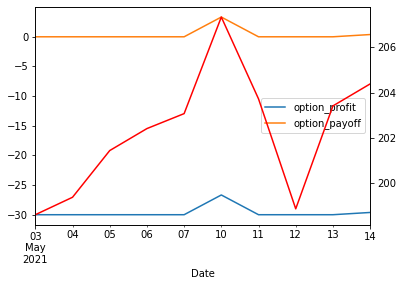

In [35]:
df = bars['MMM']
start = '2021-05-01'
maturity = '2021-05-16'
df['option_profit']=df.apply(lambda x: getProfit(x['Close'], 204, True, True, 30),axis=1)
df['option_payoff']=df.apply(lambda x: getPayoff(x['Close'], 204, True, True),axis=1)
df.tail()
df = df.loc[start:maturity]
df[['option_profit', 'option_payoff']].plot()
df.Close.plot(style='r-', secondary_y=True)

In [8]:
initial_captial = 10000
signals = pd.DataFrame()
portfolio = MyPortfolio(tickers, bars, signals, initial_captial)

In [10]:
forecast = portfolio.forecast_portfolio()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
forecast['MMM']

,yhat,yhat_upper,yhat_lower
ds,,,
2021-05-14,203.737563,206.014612,201.503868
2021-05-15,203.993201,206.013029,201.984687
2021-05-16,204.453351,206.800496,202.389599
2021-05-17,205.654201,208.028549,203.409826
2021-05-18,205.637142,207.955049,203.337355
2021-05-19,205.311287,207.532115,203.091404
2021-05-20,206.102678,208.360480,203.890355
2021-05-21,204.727181,206.958410,202.400324
2021-05-22,206.469024,208.883702,204.028235
